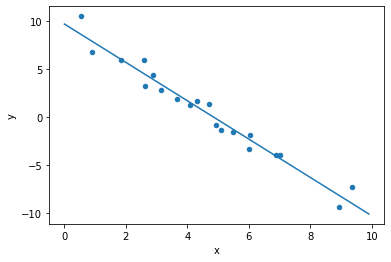

In [1]:
import numpy as np
import pandas as pd
import torch

class LR:
    def fit(self, X, y):
        X = torch.tensor(X, dtype=torch.float)
        y = torch.tensor(y, dtype=torch.float)
        self.c = torch.normal(0, 0.1, (X.shape[1],), requires_grad=True)
        self.b = torch.normal(0, 0.1, (1,), requires_grad=True)

        optimizer = torch.optim.SGD([self.c, self.b], lr=0.001)
        for i in range(1000):
            optimizer.zero_grad()
            y_pred = self.predict(X)
            loss = ((y - y_pred) ** 2).sum()
            loss.backward()
            optimizer.step()

        self.c = self.c.data.numpy()
        self.b = self.b.data.numpy()

    def predict(self, X):
        return X @ self.c + self.b

# scatter
df = pd.DataFrame()
df["x"] = np.random.uniform(0,10,size=20)
df["y"] = 10 - 2*df["x"] + np.random.normal(size=len(df))
ax = df.plot.scatter(x="x", y="y")

# fit line
lr = LR()
lr.fit(df[["x"]].values, df["y"].values)
x = np.arange(0,10,0.1)
y = lr.predict(x.reshape(-1,1))
ax.plot(x, y)